In [1]:
'''
Created by Jake Fredrich
Iris Dataset taken from https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/
Last Updated 12/31/2019
'''

In [1]:
### Imports
import warnings
import time
import numpy as np # Used for dataframe manipulation & linear algebra
import pandas as pd # Used for creating and modifying dataframes
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
#!conda install -c anaconda pydotplus -y
#!conda install -c anaconda graphviz -y
#!conda install -c anaconda seaborn -y

### Set Up Data
#### Import the data file, load into a dataframe, and divide based on identifier to be used

In [3]:
print(pydotplus.__file__)

C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\pydotplus\__init__.py


In [4]:
ELEMENT_NAMES = ['SEPAL_L','SEPAL_W','PETAL_L','PETAL_W'] #Elements to be used
HEADER_NAMES = ELEMENT_NAMES 
HEADER_NAMES.append('TYPE') #Add Identifier to Header Names

File_Name = "iris.data"
df = pd.read_csv(File_Name) # Read File

df.columns = HEADER_NAMES # Rename Column Headers
IRIS_NAMES = df.TYPE.unique() # List of all Iris Classes
df.info()# Check to see if data is consistent and has null values
# print(df.head(2))

iris_df = df
    
#print(iris_dfs[2].head()) # Confirm split
iris_df.head()

#print(df.iloc[1,0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
SEPAL_L    149 non-null float64
SEPAL_W    149 non-null float64
PETAL_L    149 non-null float64
PETAL_W    149 non-null float64
TYPE       149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,SEPAL_L,SEPAL_W,PETAL_L,PETAL_W,TYPE
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
# VIEW COUNTS OF DIFFERENT TYPES

type_counts = iris_df['TYPE'].value_counts()
type_counts.rename(columns={'TYPE':'Value_Counts'}, inplace=True)
type_counts.index.name = "TYPE"
print(type_counts.head())


TYPE
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
dtype: int64


### DATA VISUALIZATION

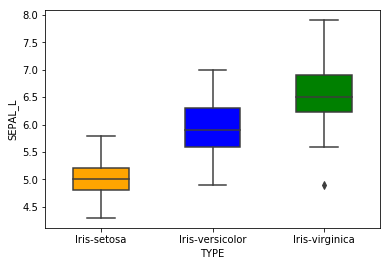

In [6]:
# Build Box Plot showing SEPAL_L for each Type 
iris_types = iris_df["TYPE"].unique().tolist() # Create unique list of iris Types
type_colors=["Orange","Blue","Green"] # Create Color List
color_dict = dict(zip(iris_types,type_colors)) # Create Color dictionary - Matching future plot colors

bplot=sns.boxplot(y='SEPAL_L', x='TYPE', data=iris_df, width=0.5) # Create plots
for i in range(0,3): # Color plots using dictionary
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[iris_types[i]])

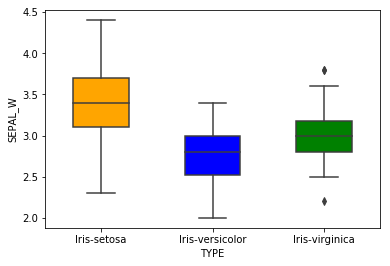

In [7]:
#  Build Box Plot showing SEPAL_W for each Type

bplot=sns.boxplot(y='SEPAL_W', x='TYPE', data=iris_df, width=0.5) # Create plots
for i in range(0,3): # Color plots using dictionary
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[iris_types[i]])

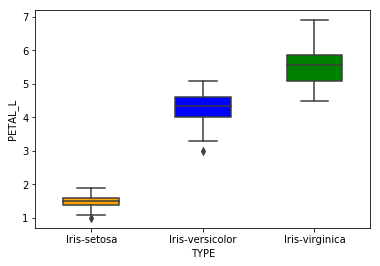

In [8]:
# Build Box Plot showing PETAL_L for each Type 
bplot=sns.boxplot(y='PETAL_L', x='TYPE', data=iris_df, width=0.5) # Create plots
for i in range(0,3): # Color plots using dictionary
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[iris_types[i]])

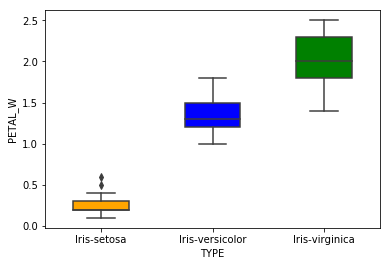

In [9]:
# Build Box Plot showing PETAL_W for each Type 
bplot=sns.boxplot(y='PETAL_W', x='TYPE', data=iris_df, width=0.5) # Create plots
for i in range(0,3): # Color plots using dictionary
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[iris_types[i]])

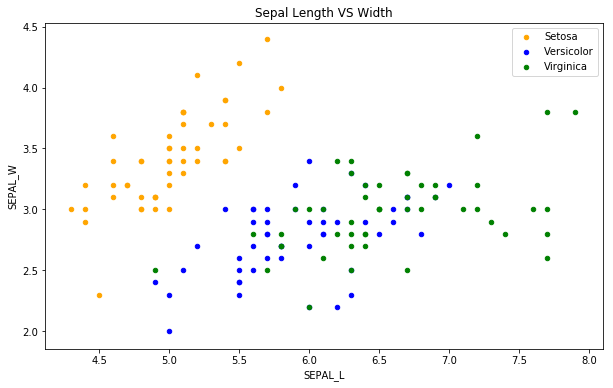

In [10]:
# Create Chart Showing Relationship between Sepal Width and Length
fig = iris_df[iris_df.TYPE=='Iris-setosa'].plot(kind='scatter', \
        x='SEPAL_L',y='SEPAL_W', color='orange', label='Setosa')
iris_df[iris_df.TYPE=='Iris-versicolor'].plot(kind='scatter',\
        x='SEPAL_L',y='SEPAL_W', color='blue', label='Versicolor', ax =fig)
iris_df[iris_df.TYPE=='Iris-virginica'].plot(kind='scatter',\
        x='SEPAL_L',y='SEPAL_W', color='green', label='Virginica', ax =fig)
fig.set_xlabel('SEPAL_L')
fig.set_ylabel('SEPAL_W')
fig.set_title('Sepal Length VS Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


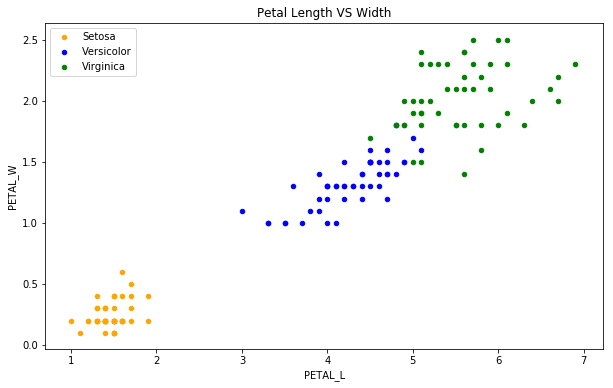

In [11]:
# Create Chart Showing Relationship between Petal Width and Length

fig = iris_df[iris_df.TYPE=='Iris-setosa'].plot(kind='scatter', \
        x='PETAL_L',y='PETAL_W', color='orange', label='Setosa')
iris_df[iris_df.TYPE=='Iris-versicolor'].plot(kind='scatter',\
        x='PETAL_L',y='PETAL_W', color='blue', label='Versicolor', ax =fig)
iris_df[iris_df.TYPE=='Iris-virginica'].plot(kind='scatter',\
        x='PETAL_L',y='PETAL_W', color='green', label='Virginica', ax =fig)
fig.set_xlabel('PETAL_L')
fig.set_ylabel('PETAL_W')
fig.set_title('Petal Length VS Width')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()


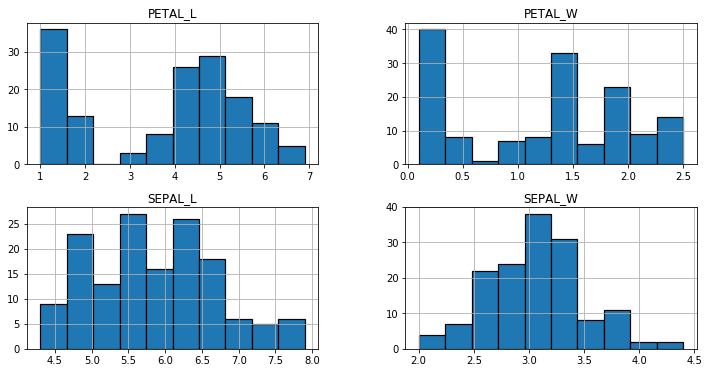

In [12]:
# Create 4 Histograms showing the frequency distributions of PETAL and SEPAL Length and Width

iris_df.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

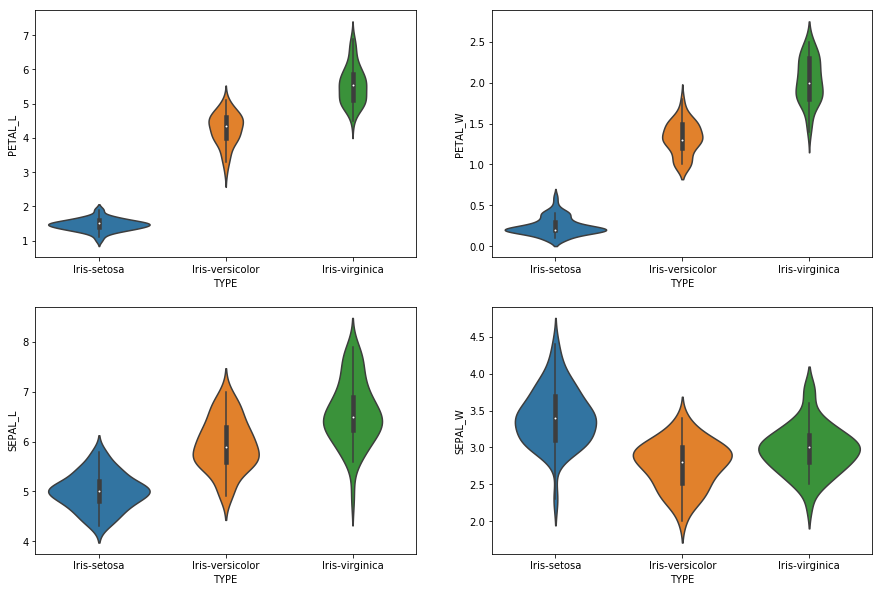

In [13]:
# Create Violin Plots to show probability density for each Characteristic and Type

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='TYPE',y='PETAL_L', data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x='TYPE', y='PETAL_W', data=iris_df)
plt.subplot(2,2,3)
sns.violinplot(x='TYPE', y='SEPAL_L', data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x='TYPE', y='SEPAL_W', data=iris_df)

In [14]:
# Import all the necessary packages to use the various classification algorithms 
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbors
from sklearn import svm #for support Vector Machine (SVM) Algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algorithm
from scipy import stats

In [15]:
iris_df.shape # get the shape of the dataset

(149, 5)

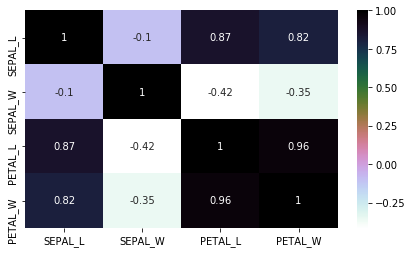

PETAL_L to PETAL_W : The Pearson Coef is  0.9623142989595632  with a P-value of P =  5.0287863749273693e-85
SEPAL_L to SEPAL_W : The Pearson Coef is  -0.10378414795681816  with a P-value of P =  0.20782011930226707
SEPAL_L to PETAL_L : The Pearson Coef is  0.8712829406718028  with a P-value of P =  2.7350659396498745e-47
SEPAL_L to PETAL_W : The Pearson Coef is  0.8169708675583585  with a P-value of P =  5.770418634058101e-37


In [16]:
# Create basic Heatmap to show correlation between differing qualities

plt.figure(figsize=(7,4))
sns.heatmap(iris_df.corr(),annot=True,cmap='cubehelix_r') #draws heatmap with input as correlation matrix calculated by (iris_main.corr())
plt.show()

# Investigate P-Values(confidence degrees) of highest Correlations
pearson_coef,p_value = stats.pearsonr(iris_df['PETAL_L'],iris_df['PETAL_W'])
print("PETAL_L to PETAL_W : The Pearson Coef is ", pearson_coef, " with a P-value of P = ", p_value)
pearson_coef,p_value = stats.pearsonr(iris_df['SEPAL_L'],iris_df['SEPAL_W'])
print("SEPAL_L to SEPAL_W : The Pearson Coef is ", pearson_coef, " with a P-value of P = ", p_value)
pearson_coef,p_value = stats.pearsonr(iris_df['SEPAL_L'],iris_df['PETAL_L'])
print("SEPAL_L to PETAL_L : The Pearson Coef is ", pearson_coef, " with a P-value of P = ", p_value)
pearson_coef,p_value = stats.pearsonr(iris_df['SEPAL_L'],iris_df['PETAL_W'])
print("SEPAL_L to PETAL_W : The Pearson Coef is ", pearson_coef, " with a P-value of P = ", p_value)

In [17]:
#Calculate F-Test Scores

# F-test score: variation between sample group means divided by variation within sample group
iris_anova = iris_df[['TYPE', 'SEPAL_W']]
grouped_anova = iris_anova.groupby(['TYPE'])
anova_results_1=stats.f_oneway(grouped_anova.get_group("Iris-setosa")['SEPAL_W'],grouped_anova.get_group("Iris-versicolor")['SEPAL_W'])
anova_results_2=stats.f_oneway(grouped_anova.get_group("Iris-virginica")['SEPAL_W'],grouped_anova.get_group("Iris-versicolor")['SEPAL_W'])

print("Iris-setosa : Iris-versicolor - SEPAL W" , anova_results_1)
print("Iris-virginica : Iris-versicolor - SEPAL W" , anova_results_2)

Iris-setosa : Iris-versicolor - SEPAL W F_onewayResult(statistic=84.04184430227546, pvalue=8.419753805042847e-15)
Iris-virginica : Iris-versicolor - SEPAL W F_onewayResult(statistic=10.276901987662784, pvalue=0.0018191004238894528)


### DATA PREPARATION
#### Set up data for modeling

In [38]:
# Splitting the Data into Training and Testing Data
train, test = train_test_split(iris_df, test_size = 0.2)# Main data is split into train and test
print(train.shape)
print(test.shape)

(119, 5)
(30, 5)


In [39]:
# Separating the Target Variable for train and test data
train_X = train[['SEPAL_L', 'SEPAL_W', 'PETAL_L', 'PETAL_W']] # Taking the training data features
train_y = train.TYPE # output of our training data
test_X = test[['SEPAL_L', 'SEPAL_W', 'PETAL_L', 'PETAL_W']]  # Taking test data features
test_y = test.TYPE # output value of test data


In [40]:
train_X.head()

,SEPAL_L,SEPAL_W,PETAL_L,PETAL_W
15,5.4,3.9,1.3,0.4
7,4.4,2.9,1.4,0.2
107,6.7,2.5,5.8,1.8
130,7.9,3.8,6.4,2.0
38,5.1,3.4,1.5,0.2


In [41]:
test_X.head()

,SEPAL_L,SEPAL_W,PETAL_L,PETAL_W
55,6.3,3.3,4.7,1.6
112,5.7,2.5,5.0,2.0
111,6.8,3.0,5.5,2.1
47,5.3,3.7,1.5,0.2
24,5.0,3.0,1.6,0.2


In [42]:
train_y.head(2) ## Output of the training data

15    Iris-setosa
7     Iris-setosa
Name: TYPE, dtype: object

In [43]:
test_y.head(2)

55     Iris-versicolor
112     Iris-virginica
Name: TYPE, dtype: object

### (SVM) SUPPORT VECTOR MACHINE

In [44]:
from sklearn import svm
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [45]:
SVM_model = svm.SVC() #select SVM algorithm
SVM_model.fit(train_X,train_y) # Train the algorithm with the training data and the training output
SVM_yhat=SVM_model.predict(test_X) #Pass the testing data to the trained algorithm

print("SVMs's Accuracy: ", metrics.accuracy_score(test_y, SVM_yhat))
JaccardSVM = jaccard_similarity_score(test_y, SVM_yhat)
print("SVM's Jaccard index: %.2f" % JaccardSVM)
F1ScoreSVM = f1_score(test_y, SVM_yhat, average='weighted')
print("SVM's F1-score: %.2f" % F1ScoreSVM  );

SVMs's Accuracy:  0.9666666666666667
SVM's Jaccard index: 0.97
SVM's F1-score: 0.97


C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [46]:
kernel ={'linear', 'rbf','poly'} # Check test accuracy using different kernel settings

# accuracy is not impacted by choice
for index,value in enumerate(kernel):
    SVM_model=SVC(kernel=value).fit(train_X, train_y.ravel())
    s=SVM_model.predict(test_X)
    print('accuracy of %s kernel is' %value , metrics.accuracy_score(test_y,SVM_yhat))

accuracy of rbf kernel is 0.9666666666666667
accuracy of linear kernel is 0.9666666666666667
accuracy of poly kernel is 0.9666666666666667


C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### LOGISTIC REGRESSION

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

LR_model = LogisticRegression()
LR_model.fit(train_X,train_y) # Fit LR Model using training data
LR_yhat=LR_model.predict(test_X)

C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [48]:
print(LR_yhat)

['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa']


In [49]:
LR_prob = LR_model.predict_proba(test_X)
logLR = log_loss(test_y, LR_prob)
print ("LogLoss: : %.2f" % logLR)
print("LRs's Accuracy: ", metrics.accuracy_score(test_y, LR_yhat))

JaccardLR = jaccard_similarity_score(test_y, LR_yhat)
print("LR's Jaccard index: %.2f" % JaccardLR)
F1ScoreLR = f1_score(test_y, LR_yhat, average='weighted')
print("LR's F1-score: %.2f" % F1ScoreLR  )

LogLoss: : 0.35
LRs's Accuracy:  1.0
LR's Jaccard index: 1.00
LR's F1-score: 1.00


### DECISION TREE

In [50]:

DT_model=DecisionTreeClassifier()
DT_model.fit(train_X,train_y) # Fit LR Model using training data
DT_yhat=DT_model.predict(test_X) # Predict using Test Data
print('The accuracy of the Decision Tree is',metrics.accuracy_score(test_y,DT_yhat))

The accuracy of the Decision Tree is 0.9666666666666667


In [51]:
print("DT's Accuracy: ", metrics.accuracy_score(test_y, DT_yhat))
JaccardDT = jaccard_similarity_score(test_y,DT_yhat)
print("DT's Jaccard index: %.2f" % JaccardDT)
F1ScoreDT = f1_score(test_y,  DT_yhat, average='weighted')
print("DT's F1-score: %.2f" % F1ScoreDT)

DT's Accuracy:  0.9666666666666667
DT's Jaccard index: 0.97
DT's F1-score: 0.97


#### Check which Depth results with highest accuracy

In [52]:
k=10 #Check 1 through 10 depth options
DT_acc=[]

for x in range(1,k):
    DT1=DecisionTreeClassifier(criterion='entropy', max_depth=x).fit(train_X,train_y.ravel()) # Fit Decision Tree using x depth on training data
    DT_yhat1=DT1.predict(test_X) # Predict using test data
    DT_acc.append(metrics.accuracy_score(test_y, DT_yhat1)) # Store Accuracy in list

DT_acc=np.asarray(DT_acc) # Convert Accuracy List to Array
print("DecisionTrees's Accuracy highest accuracy is ", DT_acc.max(), 'at max_depth: ', DT_acc.argmax()+1)

DecisionTrees's Accuracy highest accuracy is  0.9666666666666667 at max_depth:  3


#### Visualize the Decision Tree

In [53]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


#### For error: "graphviz executable error not found", locate graphviz.exe and add path to environment variables

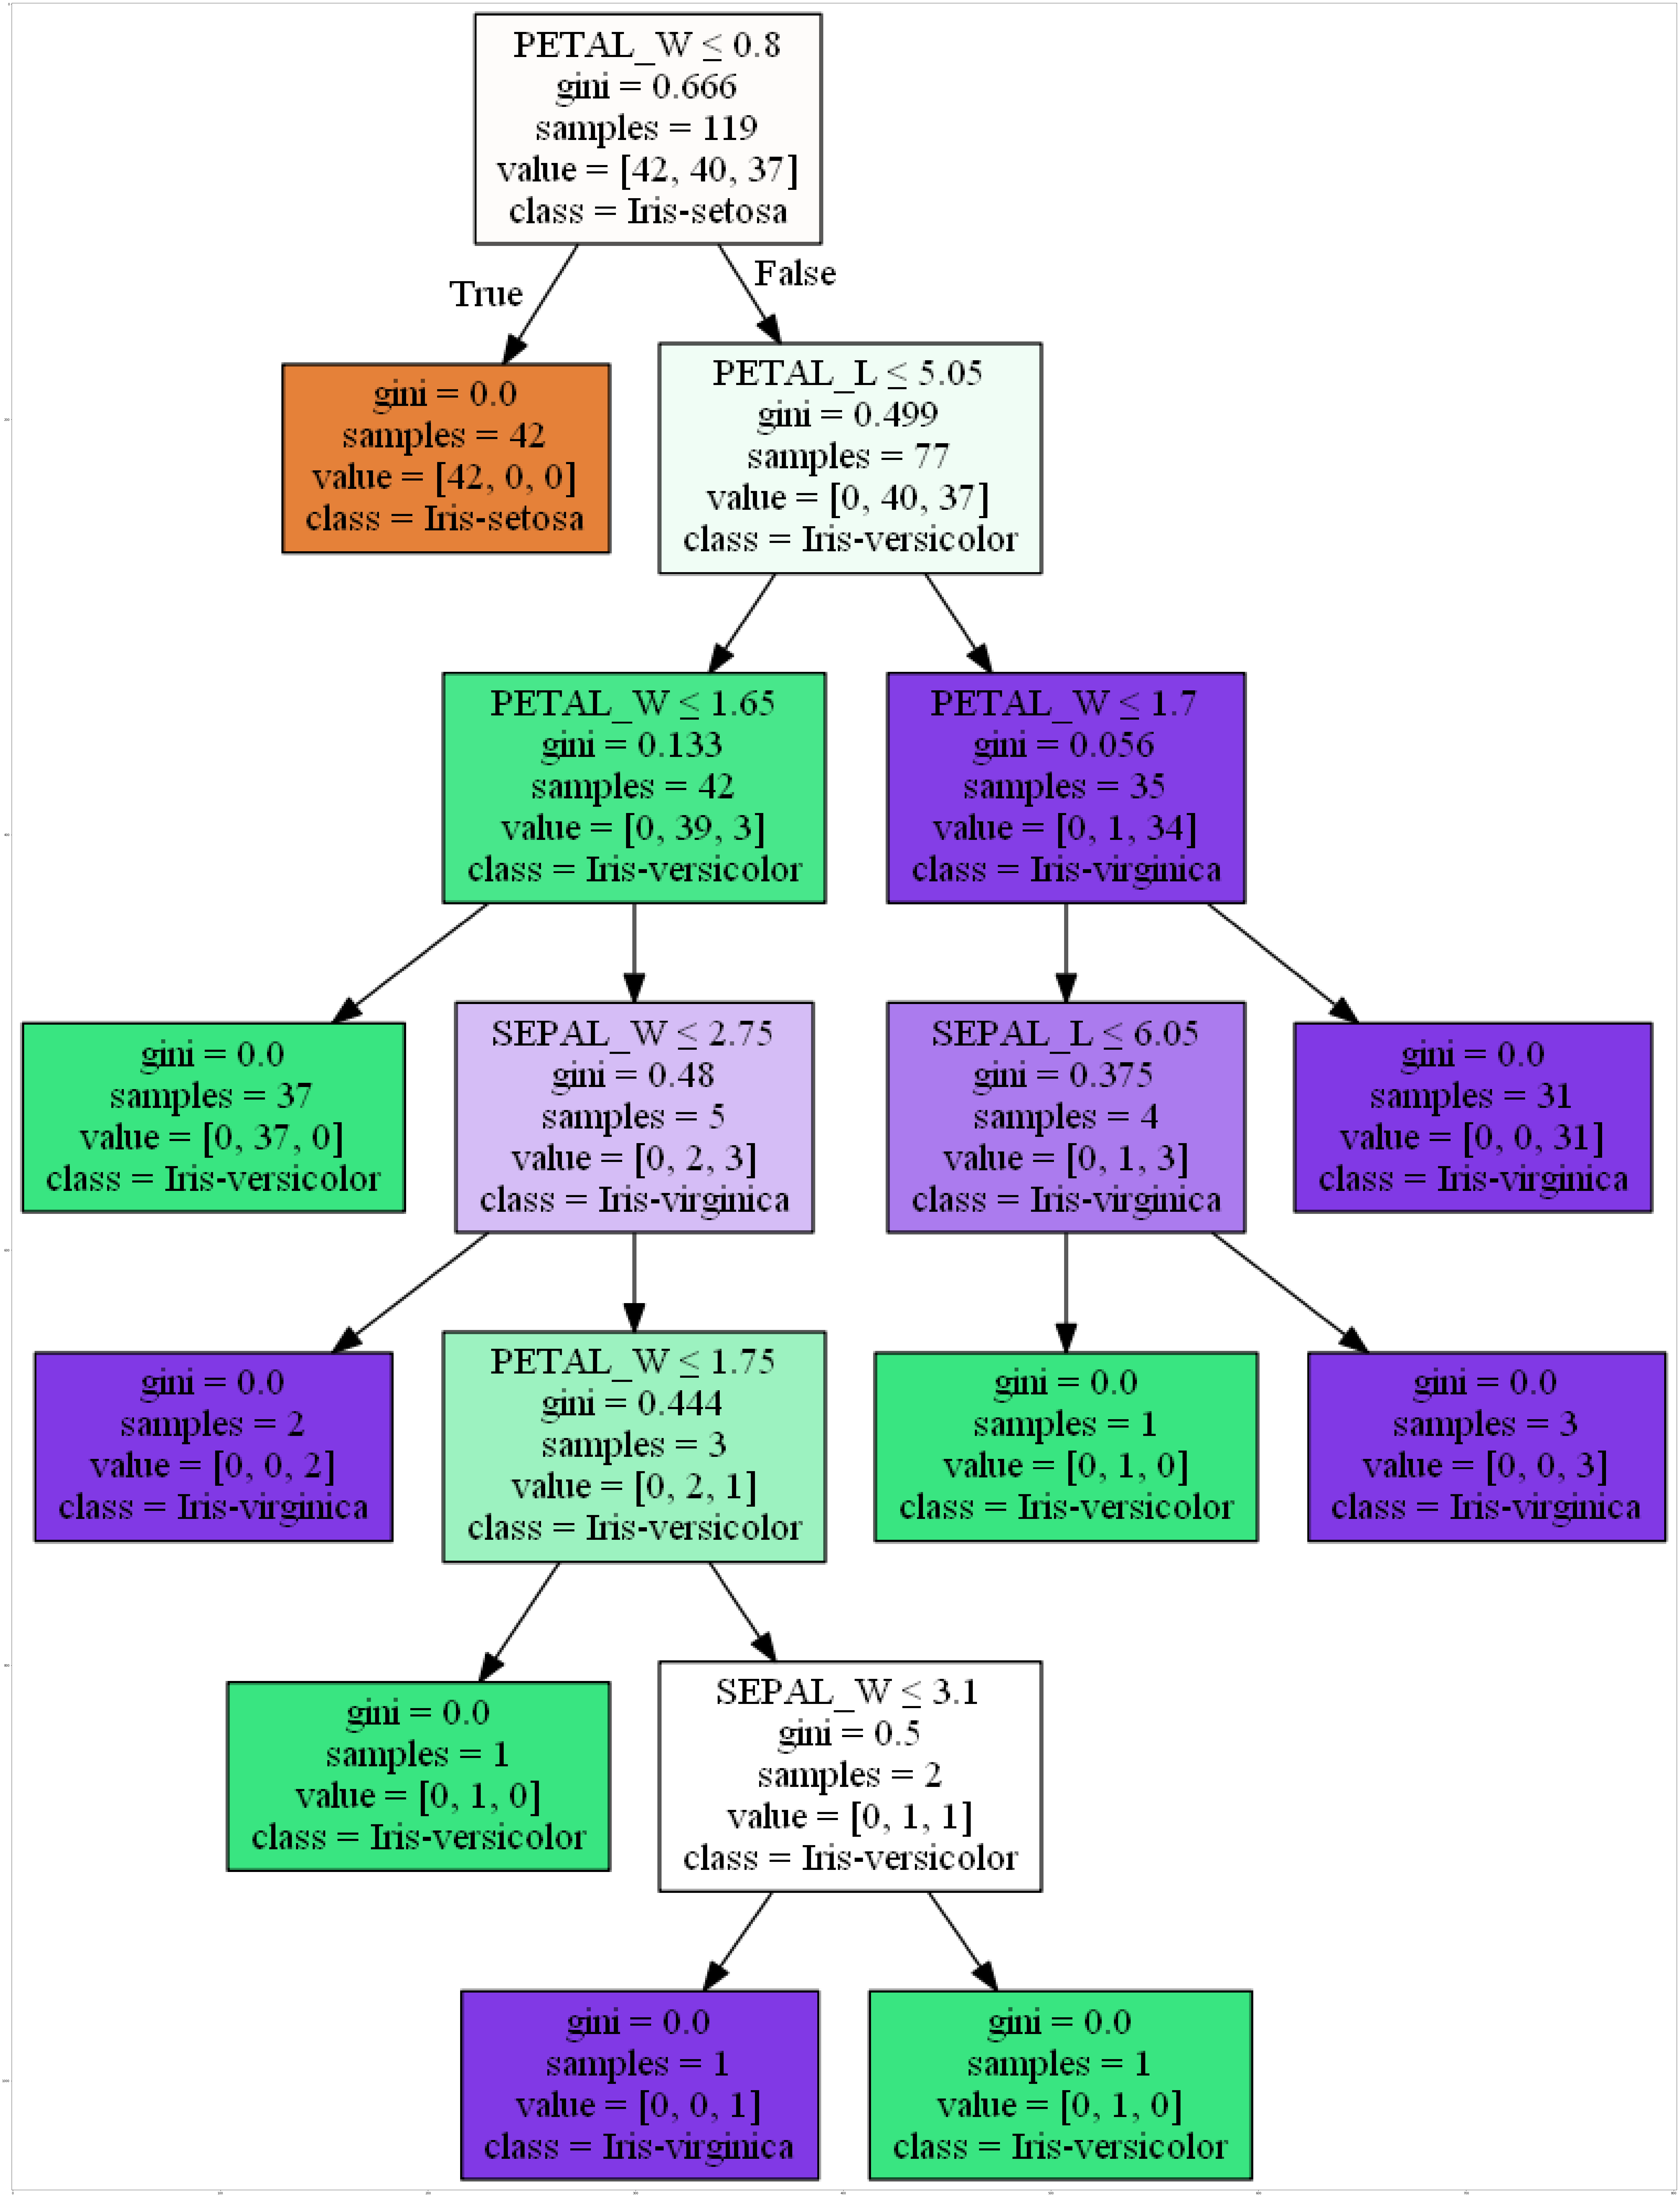

Complete


In [54]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = ELEMENT_NAMES[0:4]
targetNames = IRIS_NAMES
out=tree.export_graphviz(DT_model,feature_names=featureNames, out_file=dot_data, class_names=np.unique(train_y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()
print("Complete")

### (KNN) K Nearest Neighbors

In [55]:
KNN_model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
KNN_model.fit(train_X,train_y)
KNN_yhat=KNN_model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(test_y,KNN_yhat))

The accuracy of the KNN is 0.9666666666666667


In [56]:
#Create chart showing the accuracy of K Nearest Neighbor at different classified n_neighbors
Ks = 25 # Number of neighbors to check
mean_acc = np.zeros((Ks-1)) # Create array of ks - 1 filled with zeros.  This will be populated with mean_accuracy in the loop below.
std_acc = np.zeros((Ks-1)) # Create array of ks - 1 filled with zeros.  This will be populated with standard_accuracy in the loop below.
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict values
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_X,train_y) # Fit Model with n
    KNN_yhat=neigh.predict(test_X) # predict yhat using X_test
    mean_acc[n-1] = metrics.accuracy_score(test_y, KNN_yhat) # store accuracy score in mean_acc array

    
    std_acc[n-1]=np.std(KNN_yhat==test_y)/np.sqrt(KNN_yhat.shape[0]) # store std_acc in array

#mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)



The best accuracy was with 1.0 with k= 7


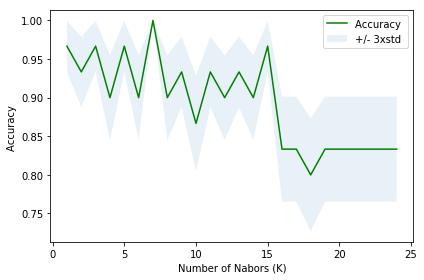

In [57]:
#Display how our different K values did in accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [58]:
## Final Model uses k=7 based on this run of the data
k = 7
#Train Model and Predict  
KNN_model = KNeighborsClassifier(n_neighbors=k).fit(train_X,train_y)
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [60]:
KNN_yhat = KNN_model.predict(test_X)# Predict using Test Data 
KNN_perc = metrics.accuracy_score(test_y, KNN_yhat) # store accuracy score in mean_acc array
print("KNN Accuracy percentage" , KNN_perc)

JaccardkNN = jaccard_similarity_score(test_y, KNN_yhat)
print("KNN Jaccard index: %.2f" % JaccardkNN)

F1ScorekNN = f1_score(test_y, KNN_yhat, average='weighted')
print("KNN F1-score: %.2f" % F1ScorekNN )

KNN Accuracy percentage 1.0
KNN Jaccard index: 1.00
KNN F1-score: 1.00


### REPORT

In [61]:
data_report =np.array([['Algorithm','Jaccard','F1-score','LogLoss'],['KNN',JaccardkNN ,F1ScorekNN,'NA'],['Decision Tree',JaccardDT,F1ScoreDT,'NA'], ['SVM',JaccardSVM,F1ScoreSVM,'NA'],
     ['LogisticRegression',F1ScoreLR,JaccardLR, logLR]])


pd.DataFrame(data = data_report[1:,1:], index = data_report[1:,0],columns = data_report[0,1:])

,Jaccard,F1-score,LogLoss
KNN,1.0,1.0,NA
Decision Tree,0.9666666666666667,0.9667936507936509,NA
SVM,0.9666666666666667,0.9667936507936509,NA
LogisticRegression,1.0,1.0,0.3464682198198403


### CHANGING THE FEATURES USED

In [66]:
# Now we explore what happens when using Petals and Sepals separately as features
petal = iris_df[['PETAL_L', 'PETAL_W', 'TYPE']]
sepal = iris_df[['SEPAL_L', 'SEPAL_W', 'TYPE']]
petal.head()


,PETAL_L,PETAL_W,TYPE
0,1.4,0.2,Iris-setosa
1,1.3,0.2,Iris-setosa
2,1.5,0.2,Iris-setosa
3,1.4,0.2,Iris-setosa
4,1.7,0.4,Iris-setosa


In [68]:
train_p, test_p = train_test_split(petal, test_size =0.3, random_state=0) # petals
train_x_p = train_p[['PETAL_W', 'PETAL_L']]
train_y_p = train_p.TYPE
test_x_p = test_p[['PETAL_W', 'PETAL_L']]
test_y_p = test_p.TYPE

train_s, test_s = train_test_split(sepal, test_size=.3, random_state = 0) # SEPAL
train_x_s = train_s[['SEPAL_W', 'SEPAL_L']]
train_y_s = train_s.TYPE
test_x_s = test_s[['SEPAL_W', 'SEPAL_L']]
test_y_s = test_s.TYPE


print(train_x_p.shape)
print(train_y_p.shape)
print(test_x_p.shape)
print(test_y_p.shape)

(104, 2)
(104,)
(45, 2)
(45,)


In [69]:
'''SVM For Petal and Sepal'''

model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))



The accuracy of the SVM using Petals is: 0.9111111111111111
The accuracy of the SVM using Sepal is: 0.7555555555555555


C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [70]:
'''Logistic Regression for Petal and Sepal'''

model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.8888888888888888
The accuracy of the Logistic Regression using Sepals is: 0.6666666666666666


C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JAKEFREDRICH\Anaconda3\envs\MyClone\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [71]:
'''Decision Tree for Petal and Sepal'''
model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:', metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s, train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction,test_y_s)
)


The accuracy of the Decision Tree using Petals is: 0.9111111111111111
The accuracy of the Decision Tree using Sepals is: 0.7555555555555555


In [72]:
'''KNeighbors with Petal and Sepal'''

model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9111111111111111
The accuracy of the KNN using Sepals is: 0.7111111111111111


([<matplotlib.axis.XTick at 0x1431c61dd68>,
 <a list of 10 Text xticklabel objects>)

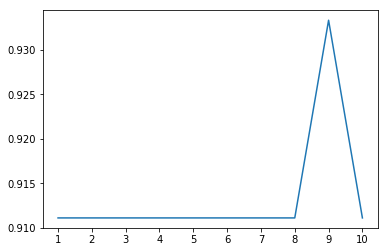

In [73]:
'''Print Chart showing accuracy'''
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_x_p,train_y_p)
    prediction=model.predict(test_x_p)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y_p)))
plt.plot(a_index, a)
plt.xticks(x)

#### It appears that using  the features separately is not beneficial.  Using all features provides better accuracy measures.  It is important to consider overfitting, additional research should be done to consider if the models producing 100% accuracy on test data are overfit.